# Støkiometriske matriser

Her er et eksempel på bruk av matriser og differensialligninger i kjemi. Det er laget av ChatGPT.

Her er et eksempel på en **støkiometrisk matrise** brukt i kjemiske reaksjoner.  

La oss si vi har følgende kjemiske reaksjoner:  

1. $ \text{A} + 2\text{B} \rightarrow \text{C} $  
2. $ \text{C} \rightarrow \text{D} + \text{E} $  

Vi kan representere disse reaksjonene med en **støkiometrisk matrise**, hvor radene representerer kjemiske arter ($A, B, C, D, E$) og kolonnene representerer reaksjoner.  

### Stoichiometrisk matrise:
$$
S =
\begin{bmatrix}
-1 & 0  \\
-2 & 0  \\
+1 & -1 \\
0  & +1 \\
0  & +1
\end{bmatrix}
$$

---

### Forklaring:
- **Første kolonne**: Representerer reaksjon 1 ($A + 2B \rightarrow C$)
  - $A$ forbrukes: $-1$
  - $B$ forbrukes: $-2$
  - $C$ dannes: $+1$  
- **Andre kolonne**: Representerer reaksjon 2 ($C \rightarrow D + E$)
  - $C$ forbrukes: $-1$
  - $D$ dannes: $+1$
  - $E$ dannes: $+1$  

Denne matrisen brukes ofte i kjemiske systemer og reaksjonsnettverk for å analysere massebalanse og reaksjonsdynamikk, f.eks. i kinetiske modeller.  

---

Her er et spesifikt eksempel på hvordan du kan representere og bruke en **støkiometrisk matrise** i Python ved hjelp av **NumPy**.  

### Implementasjon i Python:

In [1]:
import numpy as np

# Definer støkiometrisk matrise S (arter x reaksjoner)
S = np.array([
    [-1,  0],  # A
    [-2,  0],  # B
    [ 1, -1],  # C
    [ 0,  1],  # D
    [ 0,  1]   # E
])

# Definer reaksjonsrater (for eksempel tilfeldige verdier)
reaction_rates = np.array([0.5, 0.3])  # Hastighet for reaksjon 1 og 2

# Beregn endring i konsentrasjoner
delta_concentration = S @ reaction_rates

# Vis resultatet
species = ["A", "B", "C", "D", "E"]
for i, species_name in enumerate(species):
    print(f"Endring i {species_name}: {delta_concentration[i]:.2f}")

Endring i A: -0.50
Endring i B: -1.00
Endring i C: 0.20
Endring i D: 0.30
Endring i E: 0.30


---

### Forklaring:
- **S-matrisen** representerer hvordan stoffene påvirkes av reaksjonene.
- **reaction_rates** er et array med reaksjonsrater ($ v_1, v_2 $).
- Vi beregner endringen i konsentrasjoner ($ \Delta K $) ved å multiplisere **S** med reaksjonsratene:  
  $$
  \Delta K = S \cdot v
  $$
- Output viser hvordan konsentrasjonen av hvert stoff endrer seg basert på reaksjonshastighetene.

---

### Eksempel på output:
```
Endring i A: -0.50
Endring i B: -1.00
Endring i C:  0.20
Endring i D:  0.30
Endring i E:  0.30
```
Dette betyr f.eks. at stoff A minker med 0.5 enheter per tidsenhet, mens D og E øker med 0.3 enheter hver.

---

## Dymamisk simulering

Da kan vi lage en **dynamisk simulering** av konsentrasjonene over tid ved å bruke **scipy.integrate.solve_ivp**, som løser differensialligninger numerisk.  

Vi antar at reaksjonene følger **massevirkningsloven**, slik at reaksjonshastighetene er proporsjonale med reaktantenes konsentrasjoner.

---

### **Matematisk modell**
Vi har reaksjonene:
1. $ A + 2B \rightarrow C $ (rate: $ v_1 = k_1 \cdot [A] \cdot [B]^2 $)
2. $ C \rightarrow D + E $ (rate: $ v_2 = k_2 \cdot [C] $)

Differensialligningene for konsentrasjonene $K$ blir:
$$
\frac{dK}{dt} = S \cdot v
$$
der **S** er den stoichiometriske matrisen, og **v** er vektoren med reaksjonshastigheter.

---

### **Python-kode for simulering**

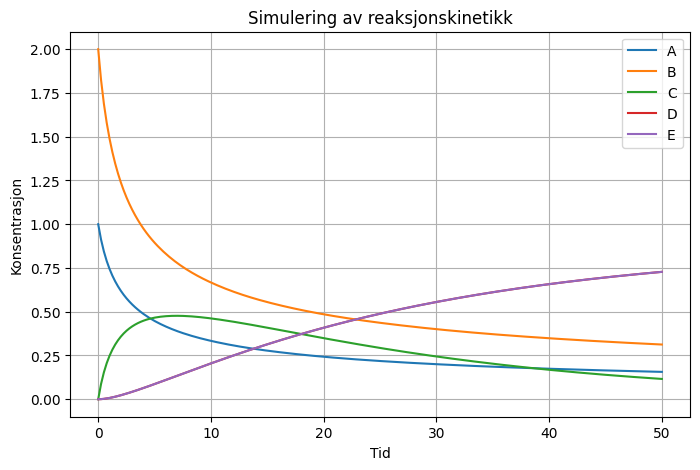

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Støkiometrisk matrise (arter x reaksjoner)
S = np.array([
    [-1,  0],  # A
    [-2,  0],  # B
    [ 1, -1],  # C
    [ 0,  1],  # D
    [ 0,  1]   # E
])

# Reaksjonshastighetskonstanter
k1 = 0.1  # Hastighetskonstant for A + 2B -> C
k2 = 0.05 # Hastighetskonstant for C -> D + E

# Initiale konsentrasjoner (A, B, C, D, E)
K0 = np.array([1.0, 2.0, 0.0, 0.0, 0.0])

# Definer differensialligningene
def reaction_system(t, K):
    A, B, C, D, E = K
    v1 = k1 * A * B**2  # Massevirkningsloven for reaksjon 1
    v2 = k2 * C         # Massevirkningsloven for reaksjon 2
    v = np.array([v1, v2])
    dCdt = S @ v  # Beregn endring i konsentrasjoner
    return dCdt

# Løsning over tidsintervallet [0, 50]
t_span = (0, 50)
t_eval = np.linspace(0, 50, 200)  # Tidssteg for evaluering
solution = solve_ivp(reaction_system, t_span, K0, t_eval=t_eval, method="RK45")

# Plot resultater
plt.figure(figsize=(8, 5))
for i, species_name in enumerate(["A", "B", "C", "D", "E"]):
    plt.plot(solution.t, solution.y[i], label=species_name)

plt.xlabel("Tid")
plt.ylabel("Konsentrasjon")
plt.legend()
plt.title("Simulering av reaksjonskinetikk")
plt.grid()

---

### **Hva gjør koden?**
- **Definerer S-matrisen** for reaksjonene.
- **Bruker massevirkningsloven** for å beregne reaksjonshastighetene $ v_1 $ og $ v_2 $.
- **Setter opp et differensiallikningssystem** for konsentrasjonene.
- **Løser systemet numerisk** med `solve_ivp` (Runge-Kutta-metode).
- **Plotter konsentrasjonene** over tid.

---

### **Hva viser plottet?**
- $ [A] $ og $ [B] $ synker fordi de forbrukes i reaksjon 1.
- $ [C] $ øker først og synker deretter når det omdannes til $ D $ og $ E $.
- $ [D] $ og $ [E] $ øker etter hvert siden de er sluttprodukter.


# Simulering av glykolyse: Glukose-fosforylering

Denne notebooken simulerer de første trinnene i glykolysen ved bruk av en stoichiometrisk matrise og numerisk løsning av differensialligninger.

## Matematisk modell

Vi ser på de to første reaksjonene i glykolysen:

1. **Glukose + ATP → Glukose-6-fosfat + ADP**
   $
   \text{C}_6\text{H}_{12}\text{O}_6 + \text{ATP} \rightarrow \text{C}_6\text{H}_{11}\text{O}_6\text{P} + \text{ADP}
   $
2. **Glukose-6-fosfat → Fruktose-6-fosfat**
   $
   \text{C}_6\text{H}_{11}\text{O}_6\text{P} \rightarrow \text{C}_6\text{H}_{11}\text{O}_6\text{P}
   $

Differensialligningene for konsentrasjonene er gitt ved:
$
\frac{dK}{dt} = S \cdot v
$
Der **S** er den stoichiometriske matrisen og **v** er reaksjonshastighetsvektoren.

---

## 🚀 Python-implementasjon

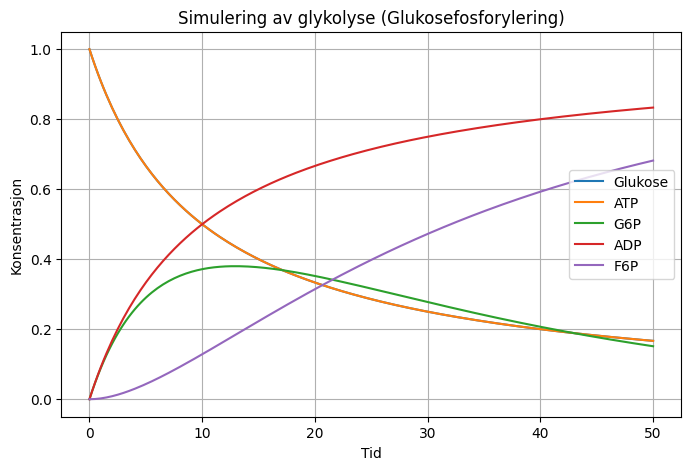

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Støkiometrisk matrise (arter x reaksjoner)
S = np.array([
    [-1,  0],  # Glukose (C6H12O6)
    [-1,  0],  # ATP
    [ 1, -1],  # Glukose-6-fosfat (G6P)
    [ 1,  0],  # ADP
    [ 0,  1]   # Fruktose-6-fosfat (F6P)
])

# Reaksjonshastighetskonstanter
k1 = 0.1  # Hastighetskonstant for Glukose + ATP -> G6P + ADP
k2 = 0.05 # Hastighetskonstant for G6P -> F6P

# Initiale konsentrasjoner (Glukose, ATP, G6P, ADP, F6P)
K0 = np.array([1.0, 1.0, 0.0, 0.0, 0.0])

# Definer differensialligningene
def reaction_system(t, K):
    Glukose, ATP, G6P, ADP, F6P = K
    v1 = k1 * Glukose * ATP  # Massevirkningsloven for reaksjon 1
    v2 = k2 * G6P            # Massevirkningsloven for reaksjon 2
    v = np.array([v1, v2])
    dCdt = S @ v  # Beregn endring i konsentrasjoner
    return dCdt

# Løsning over tidsintervallet [0, 50]
t_span = (0, 50)
t_eval = np.linspace(0, 50, 200)  # Tidssteg for evaluering
solution = solve_ivp(reaction_system, t_span, K0, t_eval=t_eval, method="RK45")

# Plot resultater
plt.figure(figsize=(8, 5))
for i, species_name in enumerate(["Glukose", "ATP", "G6P", "ADP", "F6P"]):
    plt.plot(solution.t, solution.y[i], label=species_name)

plt.xlabel("Tid")
plt.ylabel("Konsentrasjon")
plt.legend()
plt.title("Simulering av glykolyse (Glukosefosforylering)")
plt.grid()
plt.show()

---

## Tolkning av resultatene
- $[\text{Glukose}]$ og $[\text{ATP}]$ synker siden de forbrukes i første reaksjon.
- $[\text{G6P}]$ øker først, men synker når det omdannes til $[\text{F6P}]$.
- $[\text{ADP}]$ øker fordi ATP forbrukes.
- $[\text{F6P}]$ øker over tid siden det er sluttprodukt.